# **3.2 For Regression Task**

1. Exploratory Data Analysis and Data Understanding

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/jupyter/TSLA.csv")
print(df.head())

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
1  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
3  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
4  2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500


# ** Perform an initial analysis to gather a detailed description of the dataset. For example:**

(a) When and by whom was the dataset created?

-> This dataset was created by  Amol Ambkar in 2021 AD.

(b) How did you access the dataset?

-> I accessed this dataset through Kaggle.

(c) How does it align with the chosen UNSDG?

-> This dataset is aligned to Goal 7: Decent work and economic growth

(d) List all the attributes (columns) present in the dataset?

In [ ]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


**Here are some potential questions that the dataset could help answer?**

(1) Stock Price Trends & Predictions.

(2) Volatility & Market Behavior.

(3) Impact of Trading Volume.

**Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality)?**

1. Data Completeness -> The dataset appears complete, with no missing values detected in key columns (Date, Open, High, Low, Close, Volume).

2. Data Relevance -> The dataset contains essential stock market features like Date, Price (Open, High, Low, Close), and Volume, making it highly relevant for stock analysis and prediction.

3. Data Quality -> The data is well-structured with proper column formats. Stock prices and trading volumes appear to be in a realistic range, meaning there are no extreme outliers or unrealistic values.

# **2. Conducting Exploratory Data Analysis (EDA):**

**Performing data cleaning.**

In [ ]:
 #checking for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


No missing valued

In [ ]:
# Checking for duplicate rows
print(df.duplicated().sum())

0


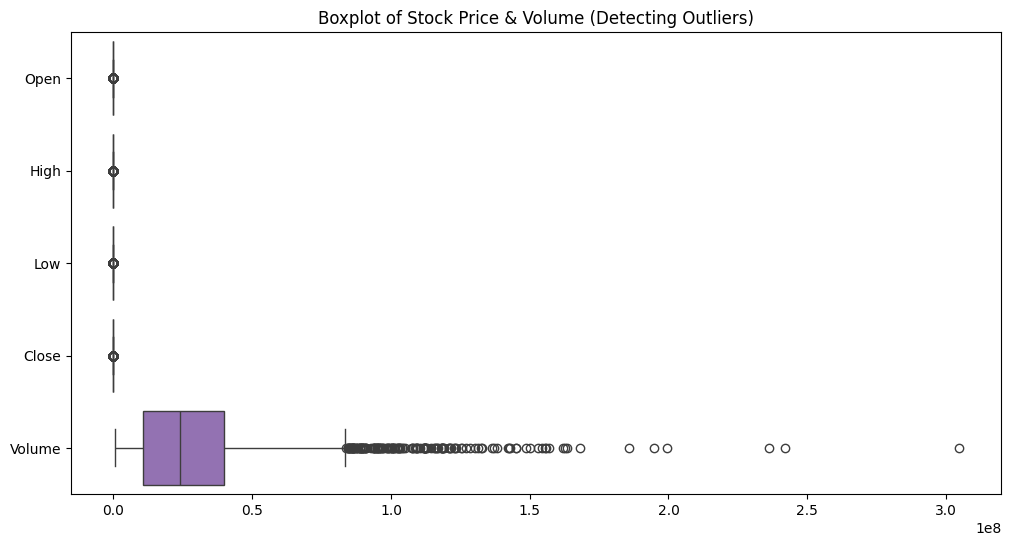

Outlier Count using Z-Score Method:
 Open      60
High      60
Low       61
Close     61
Volume    49
dtype: int64

Outlier Count using IQR Method:
 Open      138
High      139
Low       138
Close     138
Volume    154
dtype: int64


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Boxplot Analysis for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']], orient='h')
plt.title("Boxplot of Stock Price & Volume (Detecting Outliers)")
plt.show()

# 2️⃣ Z-Score Method for Outlier Detection
from scipy.stats import zscore

# Compute Z-scores
df_numeric = df[['Open', 'High', 'Low', 'Close', 'Volume']]
z_scores = np.abs(zscore(df_numeric))

# Define threshold (Commonly, Z > 3 is an outlier)
threshold = 3
outliers_zscore = (z_scores > threshold).sum()

# 3️⃣ IQR (Interquartile Range) Method for Outlier Detection
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).sum()

# Display Outlier Counts
print("Outlier Count using Z-Score Method:\n", outliers_zscore)
print("\nOutlier Count using IQR Method:\n", outliers_iqr)


No duplicated rows

In [ ]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2579.000000  2579.000000  2579.000000  2579.000000  2579.000000   
mean     49.206686    50.301806    48.073117    49.253279    49.253279   
std      57.934102    59.888383    55.852349    58.119783    58.119783   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%       7.159000     7.268000     6.989000     7.153000     7.153000   
50%      44.001999    44.660000    43.301998    43.924000    43.924000   
75%      59.339000    60.171000    57.841000    59.020000    59.020000   
max     502.140015   502.489990   470.510010   498.320007   498.320007   

             Volume  
count  2.579000e+03  
mean   3.078217e+07  
std    2.855717e+07  
min    5.925000e+05  
25%    1.047400e+07  
50%    2.413100e+07  
75%    3.979150e+07  
max    3.046940e+08  


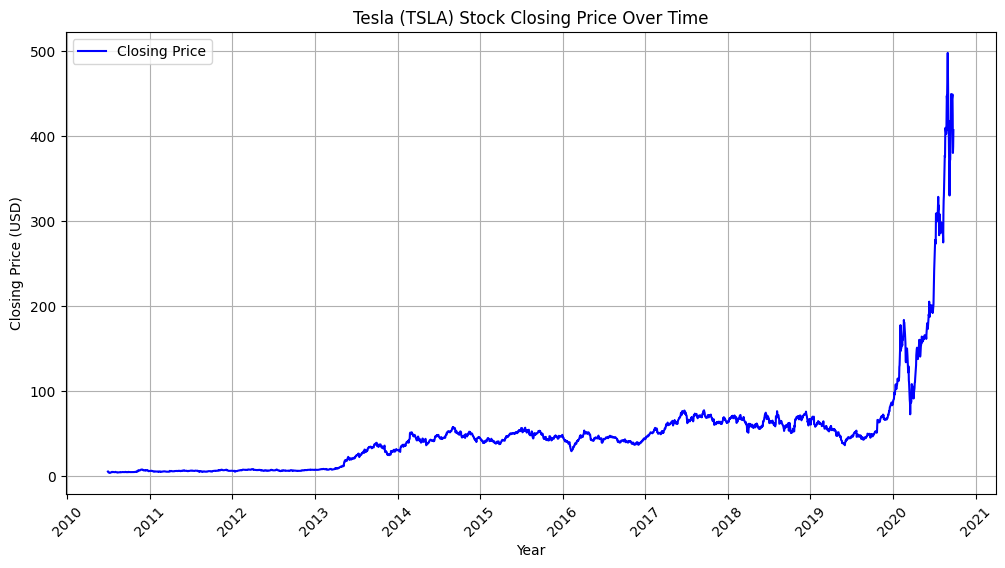

In [ ]:
# Plot Closing Price Over Time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import date formatting module
a
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/jupyter/TSLA.csv")

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plot Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")

# Format x-axis to display years properly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'YYYY'

plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")
plt.title("Tesla (TSLA) Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


In above visualization:

**Line chart** visualizes Tesla’s stock closing price over time from 2010 to 2021.

**In early years 2010-2019** Tesla's stock price was relatively stable and slowly increasing with periodic fluctuations. Prices remained under $100 for a long time.

**Breakout Growth 2020-2021** Around mid-2020, there was a massive upward surge in price. Stock price crossed $500 by the end of 2020, showing extreme growth.

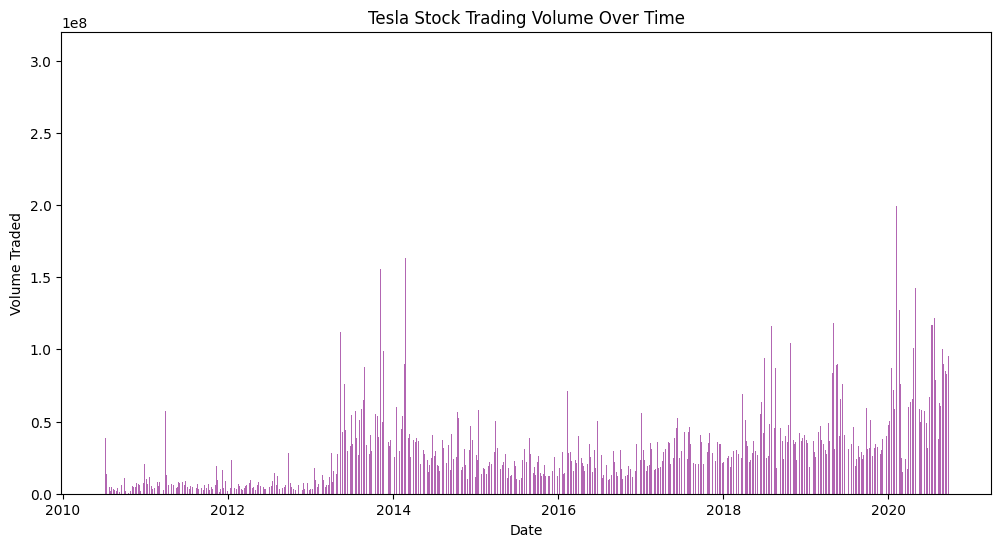

In [ ]:
#Trading volume overtime Visualization
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='purple', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Tesla Stock Trading Volume Over Time")
plt.show()

In above visualization:

**Bar chart** is indicating that it visualizes the number of shares traded for Tesla stock across various dates.

**Trading volume chart** provides valuable insights into the trading behavior of Tesla stock. The overall upward trend in trading activity indicates growing interest in the company, while spikes can signify significant events impacting investor behavior. Understanding these patterns can help inform future investment strategies and analyses of Tesla's market performance.

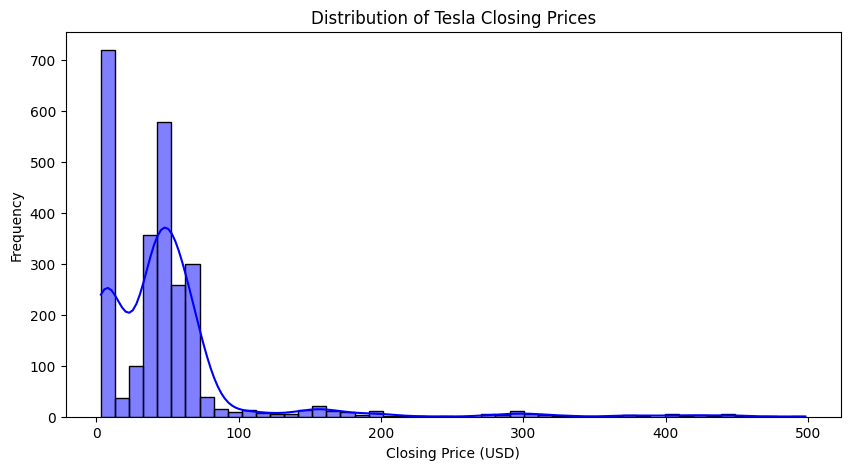

In [ ]:
# Calculate Volatility (Rolling Standard Deviation of Closing Price)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Tesla Closing Prices")
plt.show()

In above visualization:

**Histogram** indicates it visualizes the frequency distribution of Tesla's closing stock prices over the examined period.

**Distribution of Tesla's closing prices** provides insights into its price behavior and volatility over time. The left-skewed distribution indicates that while Tesla has reached significant valuations recently, the majority of trading history reflects much lower price levels. The shift to higher prices in later years signifies increased investor confidence and changing market perceptions surrounding Tesla. Analyzing this distribution helps investors understand the stock's historical context, aiding in decision-making regarding future investments.

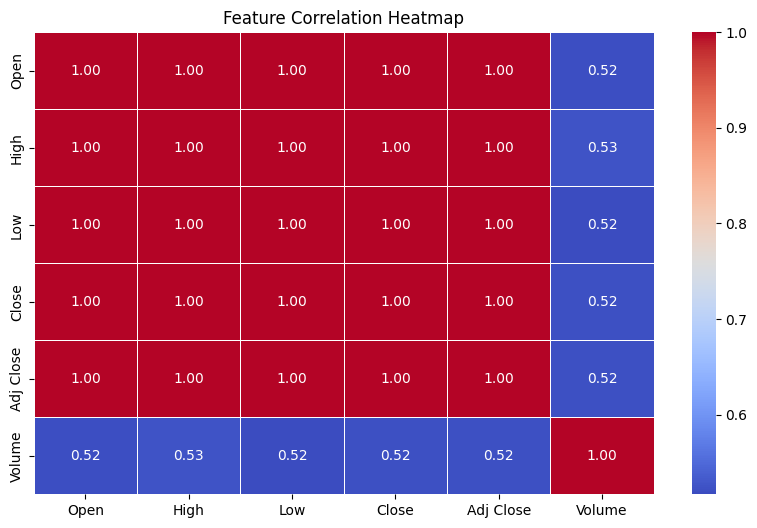

In [ ]:
#Correlation HeatMap to visualize the relationships between different stock price features.
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop(columns=['Date']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In above visualization:

**Correlation Heatmap** Computes correlations between stock price features.

Strong positive correlation between Open, High, Low, Close prices. And, Volume may have a weaker correlation with stock prices but could still be useful.

# **2. Build a Model from Scratch [5]:**

**For the Regression task, build an appropriate model from scratch, such as Linear Regression, and report the
appropriate evaluation metrics on the train and test sets (e.g., Mean Squared Error, R-squared).**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/jupyter/TSLA.csv')

In [ ]:
# Display basic info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB
None
         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
1  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
3  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
4  2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500


In [ ]:
# Convert 'Date' to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [ ]:
# Drop original 'Date' column
data.drop(columns=['Date'], inplace=True)

In [ ]:
# Selecting relevant features (assuming 'Close' is the target variable)
X = data.drop(columns=['Close'])
y = data['Close']

In [ ]:
# Handling missing values  Data Preprocessing
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

In [ ]:
# Normalize features  Data Preprocessing
X = (X - X.mean()) / X.std()

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Adding bias term to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
# Linear Regression Class
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.losses = []

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, error)

            # Update weights
            self.weights -= self.lr * dw

            # Compute loss (MSE) and store it
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights)

In [ ]:
# Train the model
model = LinearRegressionScratch(lr=0.01, epochs=1000)
model.fit(X_train, y_train)

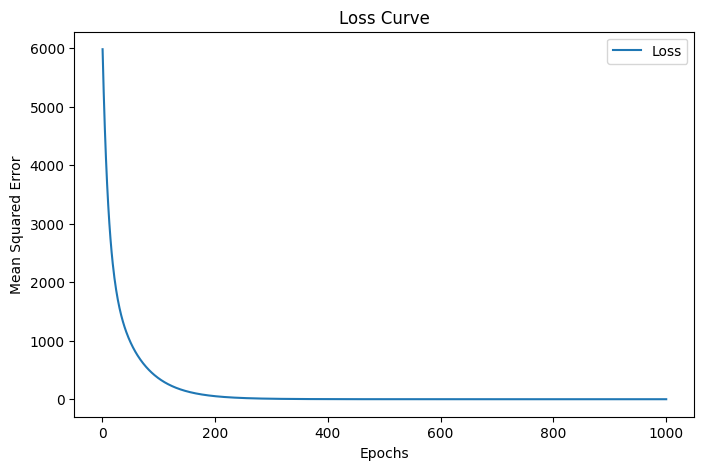

In [ ]:
# Plot Loss Curve to track training progress
plt.figure(figsize=(8, 5))
plt.plot(range(1, model.epochs + 1), model.losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluation Performance Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
print("Train Metrics:")
print(f"MSE: {train_mse:.4f}, R²: {train_r2:.4f}")

Train Metrics:
MSE: 2.4618, R²: 0.9993


In [ ]:
print("\nTest Metrics:")
print(f"MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Test Metrics:
MSE: 2.2530, R²: 0.9992


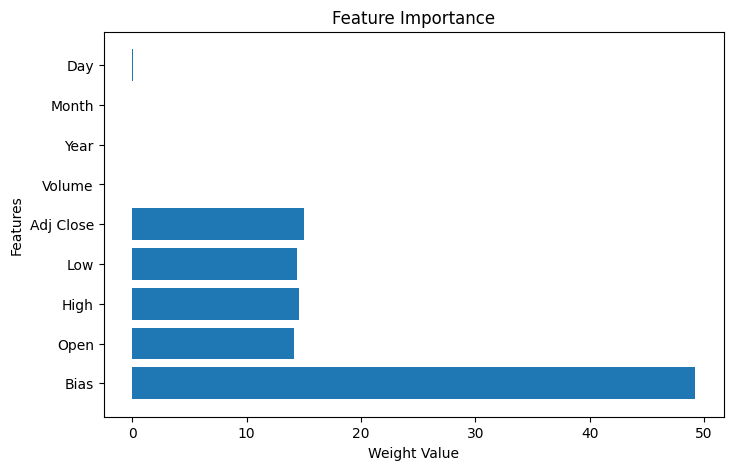

In [ ]:
# Feature Importance Plot Displays which features impact predictions most.
import seaborn as sns

plt.figure(figsize=(8, 5))
feature_names = ['Bias'] + list(X.columns)
plt.barh(feature_names, model.weights)
plt.xlabel('Weight Value')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 9.763511144570534
R2 Score: 0.9965443528887896


R² (R-squared Score) – Measures how much variance in the target variable is explained by the model.

Mean Squared Error (MSE) – Measures average squared difference between predicted and actual values.

Mean Absolute Error (MAE) – Measures the average absolute errors (less sensitive to outliers than MSE).

Root Mean Squared Error (RMSE) – Similar to MSE but gives error in original units for better interpretation.

**With feature selection and hyperparameter tuning**

# **Hyperparameter tuning and feature selection of both the models**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/jupyter/TSLA.csv')

In [ ]:
# Convert 'Date' to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [ ]:
# Drop original 'Date' column
data.drop(columns=['Date'], inplace=True)

In [ ]:
# Define features and target
X = data.drop(columns=['Close'])  # Features (all except target variable)
y = data['Close']  # Target variable

In [ ]:
# Handling missing values (Data Preprocessing)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

In [ ]:
# Normalize features
X = (X - X.mean()) / X.std()

In [ ]:
# Feature Selection using Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y.astype(int))

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_
important_features = X.columns[feature_importances > 0.01]  # Threshold for importance

In [ ]:
X = X[important_features]

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_
important_features = X.columns[feature_importances > 0.01]  # Threshold for importance

In [ ]:
X = X[important_features]

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Adding bias term to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
class LinearRegressionScratch(BaseEstimator):
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.losses = []

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, error)

            # Update weights
            self.weights -= self.lr * dw

            # Compute loss (MSE) and store it
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights)

    def get_params(self, deep=True):
        return {'lr': self.lr, 'epochs': self.epochs}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
model = LinearRegressionScratch()

In [ ]:
param_grid = {'lr': [0.001, 0.01, 0.1], 'epochs': [500, 1000, 1500]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegressionScratch(),
             param_grid={'epochs': [500, 1000, 1500], 'lr': [0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'epochs': 1500, 'lr': 0.1}


In [ ]:
# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.5668155974724582
R2 Score: 0.9994454493150022


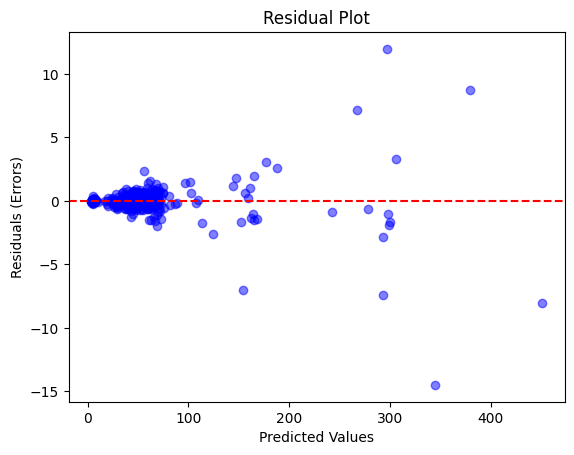

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

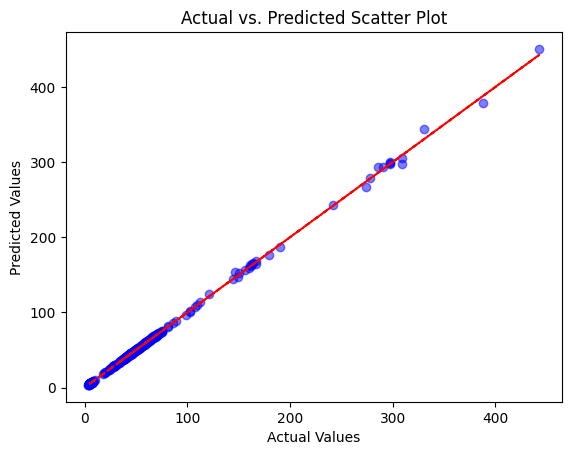

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Scatter Plot")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters for Decision Tree Regressor
print("Best Parameters for Decision Tree Regressor:", dt_grid_search.best_params_)


Best Parameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
# Train the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [ ]:
# Make predictions with Decision Tree Regressor
y_pred_dt = best_dt_model.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R2 Score: {r2_dt}")


Decision Tree Regressor Results:
Mean Squared Error: 6.064495523563892
R2 Score: 0.9978535635258013


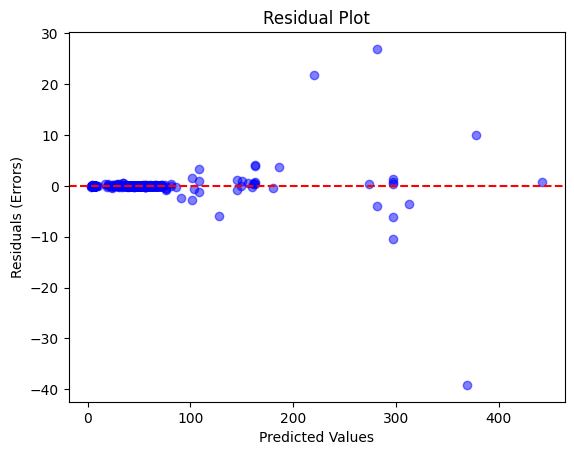

In [ ]:
residuals = y_test - y_pred_dt
plt.scatter(y_pred_dt, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

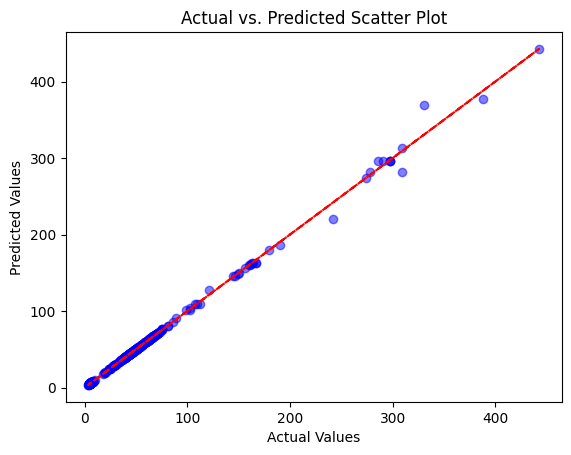

In [ ]:
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Scatter Plot")
plt.show()

# **Final Primary Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator


In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/jupyter/TSLA.csv')


In [ ]:
# Convert 'Date' to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [ ]:
# Drop original 'Date' column
data.drop(columns=['Date'], inplace=True)

In [ ]:
# Define features and target
X = data.drop(columns=['Close'])  # Features (all except target variable)
y = data['Close']  # Target variable

In [ ]:
# Handling missing values (Data Preprocessing)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

In [ ]:
# Normalize features
X = (X - X.mean()) / X.std()

In [ ]:
# Feature Selection using Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y.astype(int))

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_
important_features = X.columns[feature_importances > 0.01]  # Threshold for importance

In [ ]:
X = X[important_features]

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Adding bias term to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
class LinearRegressionScratch(BaseEstimator):
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.losses = []

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, error)

            # Update weights
            self.weights -= self.lr * dw

            # Compute loss (MSE) and store it
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights)

    def get_params(self, deep=True):
        return {'lr': self.lr, 'epochs': self.epochs}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
model = LinearRegressionScratch()

In [ ]:
param_grid = {'lr': [0.001, 0.01, 0.1], 'epochs': [500, 1000, 1500]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegressionScratch(),
             param_grid={'epochs': [500, 1000, 1500], 'lr': [0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'epochs': 1500, 'lr': 0.1}


In [ ]:
# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.5668155974724582
R2 Score: 0.9994454493150022


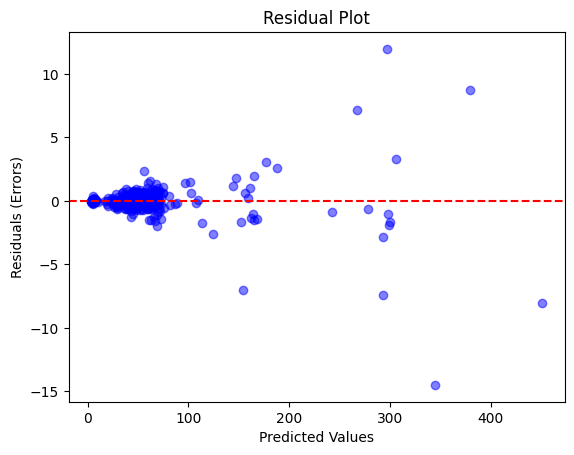

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()


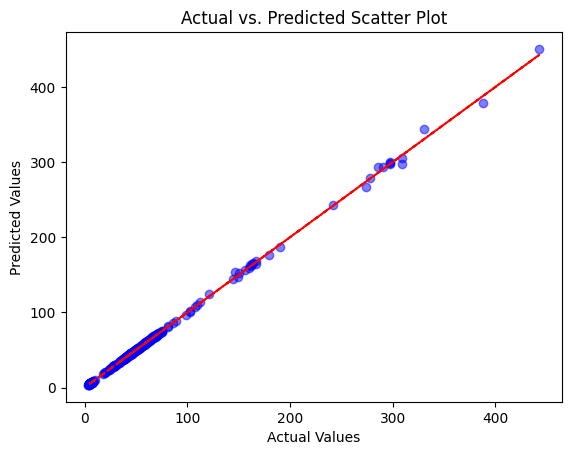

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Scatter Plot")
plt.show()
